In [6]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 4
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_big_minstable_r4_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r4.csv", delimiter=" ")


print(menor.shape)

oi=np.array([[0,1,2],[3,4,5],[6,7,8],[9,10,11]])

print(np.sum(oi,axis=0)[0]/oi.shape[0])

(11032, 4)
4.5


In [7]:


def turnintoarray(erro_list,d):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),d)
    return erro_array

    
def geterrors(FUTUREerror):
    
    a = abs(FUTUREerror)
    b = FUTUREerror**2
    
    mae = []
    mse = []
    rmse = []
    
    for i in range(FUTUREerror.shape[1]):
        mae.append(np.sum(a,axis=0)[i]/FUTUREerror.shape[0])
        mse.append(np.sum(b,axis=0)[i]/FUTUREerror.shape[0])
        rmse.append(np.sqrt(np.sum(b,axis=0)[i]/FUTUREerror.shape[0]))
        
   
    
    return mae,mse,rmse

In [8]:


future_error = []




for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    future_t = np.zeros((10))
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 100
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    future_error.append(prediction.flatten()-data[trainlen:trainlen+future])
   

    
    
    

0 test error: 7.561320409119809
1 test error: 9.429047248481075
2 test error: 0.46320473695177633
3 test error: 11.926755482438388
4 test error: 1.9545293250479625
5 test error: 11.240612340608003
6 test error: 12.899210052774729
7 test error: 13.50663730157718
8 test error: 0.4605272199595156
9 test error: 10.119273308096103
10 test error: 14.013344376523866
11 test error: 4.078840472851919
12 test error: 9.162835382996763
13 test error: 0.42552659227860523
14 test error: 12.251954019604584
15 test error: 16.045317695471276
16 test error: 2.99296506837643
17 test error: 12.12630876600623
18 test error: 0.47424580332919614
19 test error: 12.298687297916306
20 test error: 0.9802181555429726
21 test error: 11.524351786275698
22 test error: 11.390428310498132
23 test error: 11.178213732165855
24 test error: 6.84589722837124
25 test error: 15.727853509714961
26 test error: 14.701801277271557
27 test error: 0.45826936975680066
28 test error: 0.9302589137061966
29 test error: 3.9605705058647

240 test error: 15.154778016411731
241 test error: 0.43099960903020756
242 test error: 0.4516444739906396
243 test error: 10.605607082335988
244 test error: 2.0552777049426654
245 test error: 4.4244878574399396
246 test error: 11.618594621529773
247 test error: 1.5084447232469251
248 test error: 9.56800743858951
249 test error: 0.4422058302788283
250 test error: 0.47950358650586195
251 test error: 12.64504425474735
252 test error: 1.6934227135781608
253 test error: 3.2122027626845453
254 test error: 2.1382417244195797
255 test error: 11.286142275623149
256 test error: 2.6523761111579747
257 test error: 7.5318653342115125
258 test error: 0.4765340052626433
259 test error: 5.297574057289403
260 test error: 2.499482251117863
261 test error: 0.4499337832116689
262 test error: 1.3065421732007914
263 test error: 12.688953158419572
264 test error: 14.224319639843664
265 test error: 11.872346619213742
266 test error: 0.4393664303189493
267 test error: 15.662549020306734
268 test error: 14.8880

476 test error: 1.5776561594815421
477 test error: 0.3865549701900606
478 test error: 11.457541559209501
479 test error: 11.112356215592055
480 test error: 1.9877939600107593
481 test error: 13.05505466526629
482 test error: 8.988059257134234
483 test error: 5.258183823291411
484 test error: 12.175709118344422
485 test error: 18.142859255975605
486 test error: 0.4585150416335868
487 test error: 10.431403486492634
488 test error: 7.583286482400825
489 test error: 12.41492656884665
490 test error: 0.4384032469544917
491 test error: 9.699927406275604
492 test error: 8.479957540188229
493 test error: 0.41959411112405365
494 test error: 2.323080108313029
495 test error: 0.4766608391691144
496 test error: 14.2711030027906
497 test error: 12.209322305119178
498 test error: 0.4591472553132033
499 test error: 9.96701595293287
500 test error: 6.78110171319327
501 test error: 1.261190208947156
502 test error: 6.383620252946064
503 test error: 13.13547212712996
504 test error: 2.1981594483897657
5

714 test error: 0.42756962065304643
715 test error: 11.092594110777522
716 test error: 11.983480729515524
717 test error: 8.810477265370944
718 test error: 11.753874843680492
719 test error: 11.221944307059696
720 test error: 2.508856784664151
721 test error: 2.5838504730428262
722 test error: 3.7099778103689025
723 test error: 5.142662408703122
724 test error: 2.9437105646287822
725 test error: 0.418633778972289
726 test error: 2.742345426638007
727 test error: 7.915357948277708
728 test error: 7.918818869543375
729 test error: 0.8572628035883502
730 test error: 12.415720520698002
731 test error: 0.44201905577789186
732 test error: 2.6435059474025135
733 test error: 6.444667677484034
734 test error: 0.4705593335517035
735 test error: 10.061735152062724
736 test error: 13.551898826742988
737 test error: 6.7930690664229925
738 test error: 14.101597013991254
739 test error: 2.5636536439180158
740 test error: 1.5221202456909189
741 test error: 7.904995116841726
742 test error: 0.496373065

951 test error: 12.036996392093283
952 test error: 0.4498512726240001
953 test error: 7.148302353688645
954 test error: 11.223685113513568
955 test error: 2.13301426093487
956 test error: 13.938218635888441
957 test error: 10.19007853162533
958 test error: 0.44940250073978
959 test error: 21.21412693940617
960 test error: 0.4929145912979858
961 test error: 0.4310191756198064
962 test error: 14.935574759131297
963 test error: 9.809190583463188
964 test error: 10.812204397202214
965 test error: 0.43192970669821795
966 test error: 13.207160394563488
967 test error: 14.602203122548687
968 test error: 2.184736128147392
969 test error: 10.317897639202062
970 test error: 12.307723505060313
971 test error: 1.1205012236451923
972 test error: 8.81668214582624
973 test error: 8.598707344738207
974 test error: 3.862712467399549
975 test error: 0.4389927759939794
976 test error: 0.4590738087243773
977 test error: 0.3992321820280935
978 test error: 0.42066120097370124
979 test error: 14.463338190037

1185 test error: 0.4630535840249624
1186 test error: 9.010854071431703
1187 test error: 0.4761400403748827
1188 test error: 10.167608088728525
1189 test error: 0.43450428791854034
1190 test error: 0.7051862772953374
1191 test error: 0.4498245815574528
1192 test error: 0.4816175266031971
1193 test error: 15.721363871121863
1194 test error: 15.061265376835598
1195 test error: 15.85661368623106
1196 test error: 15.185305291740896
1197 test error: 8.141773624268444
1198 test error: 0.44014205455473204
1199 test error: 5.869355986469034
1200 test error: 13.64130507715921
1201 test error: 7.431866059216133
1202 test error: 0.43372607063354657
1203 test error: 14.863385267861707
1204 test error: 4.605998808608536
1205 test error: 9.847205870796628
1206 test error: 9.340554305933125
1207 test error: 10.868408720233303
1208 test error: 0.47941497007411266
1209 test error: 15.058562639598392
1210 test error: 0.5115053786588751
1211 test error: 8.862693479773249
1212 test error: 8.94901752664844


1416 test error: 1.6126010527395835
1417 test error: 1.159196915702717
1418 test error: 9.856314180942807
1419 test error: 15.888840406160446
1420 test error: 0.4604969456456494
1421 test error: 11.246128398106368
1422 test error: 7.087171349942876
1423 test error: 0.4923100549204643
1424 test error: 0.4505178267246696
1425 test error: 0.4328687604252346
1426 test error: 0.446295637455251
1427 test error: 1.9777620422331346
1428 test error: 14.418015959913848
1429 test error: 8.386574299113676
1430 test error: 0.4242167587845179
1431 test error: 10.953057691419756
1432 test error: 11.473126348108666
1433 test error: 6.608765521579272
1434 test error: 0.44338856561399703
1435 test error: 4.946021366630181
1436 test error: 13.65219668805193
1437 test error: 7.018910567962125
1438 test error: 15.168607985498781
1439 test error: 1.5314607294517448
1440 test error: 22.52554074308932
1441 test error: 8.466635170952639
1442 test error: 12.715080685072905
1443 test error: 12.379178522152678
14

1646 test error: 8.359481928205339
1647 test error: 13.471848064824359
1648 test error: 12.179644546876704
1649 test error: 11.464597008107896
1650 test error: 12.305841090350235
1651 test error: 6.148170967239649
1652 test error: 13.603756514042594
1653 test error: 8.606082307923279
1654 test error: 2.360590706326471
1655 test error: 12.405078047826388
1656 test error: 0.46777918707617483
1657 test error: 0.40897756417478753
1658 test error: 11.87227411424549
1659 test error: 0.4942811645696158
1660 test error: 0.4326906569416702
1661 test error: 0.8178126371405635
1662 test error: 0.4663073003513881
1663 test error: 0.43852182993639793
1664 test error: 0.4561136244697064
1665 test error: 8.25204150405565
1666 test error: 0.4396940633398829
1667 test error: 15.825746325712617
1668 test error: 9.872262546787814
1669 test error: 5.697110617524554
1670 test error: 13.294503888504455
1671 test error: 0.46915265449333654
1672 test error: 9.475705716032046
1673 test error: 5.163490099928772

1876 test error: 0.472002353347261
1877 test error: 11.36350612162045
1878 test error: 2.7491562703910026
1879 test error: 9.828173278465153
1880 test error: 13.422617177725838
1881 test error: 0.46836914548462677
1882 test error: 13.193283727621713
1883 test error: 12.5300737170884
1884 test error: 0.4270356020255644
1885 test error: 0.45274880661082745
1886 test error: 12.709206844635753
1887 test error: 9.729386058630448
1888 test error: 0.5675804514317215
1889 test error: 0.4291289491345535
1890 test error: 4.711101515367447
1891 test error: 6.84973993426567
1892 test error: 11.664725427437311
1893 test error: 0.7167285080965816
1894 test error: 5.7891078851986855
1895 test error: 6.609666991796189
1896 test error: 14.268483816648548
1897 test error: 6.660614358346554
1898 test error: 0.42917497659428505
1899 test error: 2.6609968708331717
1900 test error: 1.474340450939923
1901 test error: 0.4518220175770718
1902 test error: 0.4515424267980326
1903 test error: 0.4774211190108411
1

2107 test error: 0.4280617572083195
2108 test error: 1.5348257729027315
2109 test error: 1.2757488469573908
2110 test error: 0.726548351153206
2111 test error: 13.048752848075102
2112 test error: 0.4562031797922351
2113 test error: 2.120198442060211
2114 test error: 0.834512964151746
2115 test error: 11.981186640984843
2116 test error: 8.626538363561664
2117 test error: 11.233249322592973
2118 test error: 11.717041710467399
2119 test error: 13.92224205382686
2120 test error: 6.222627816401536
2121 test error: 5.065107858675731
2122 test error: 0.5164333083873236
2123 test error: 9.607224039394726
2124 test error: 0.46059603616539274
2125 test error: 2.6036659859572153
2126 test error: 15.147283064735863
2127 test error: 0.4625235715804849
2128 test error: 10.661611919842791
2129 test error: 14.002867926873495
2130 test error: 11.613456707488973
2131 test error: 7.369394662137128
2132 test error: 3.5812280729836163
2133 test error: 2.9883046741258132
2134 test error: 12.216449681904148


2339 test error: 0.46064281896574893
2340 test error: 6.9981359746358525
2341 test error: 9.009810154363946
2342 test error: 0.4295423665103605
2343 test error: 3.1785124556097784
2344 test error: 12.221007295431617
2345 test error: 0.4681291667266409
2346 test error: 6.326672323490167
2347 test error: 8.285594671921048
2348 test error: 0.4409556792149708
2349 test error: 0.4920594937041633
2350 test error: 13.540310958169616
2351 test error: 13.61972153450025
2352 test error: 13.261105460156292
2353 test error: 0.45564921108682277
2354 test error: 0.41452270536793373
2355 test error: 0.37019305631397853
2356 test error: 0.4343892314691485
2357 test error: 0.48911548582785386
2358 test error: 9.985214434162978
2359 test error: 10.334295055395149
2360 test error: 0.4903282660434254
2361 test error: 5.1965005582775
2362 test error: 1.2245010375198195
2363 test error: 0.46731755004105224
2364 test error: 0.4590168261239235
2365 test error: 0.4616669797171065
2366 test error: 13.6987197784

2568 test error: 12.85524634754264
2569 test error: 0.7238804360625686
2570 test error: 13.805597673981485
2571 test error: 6.549275777631678
2572 test error: 0.456673125409267
2573 test error: 8.79296804555083
2574 test error: 0.45371468366426315
2575 test error: 6.347197232292869
2576 test error: 10.334753485939496
2577 test error: 15.465939146940292
2578 test error: 5.326915091861886
2579 test error: 14.193312482067308
2580 test error: 2.305297172535757
2581 test error: 2.4200635414815954
2582 test error: 12.43351033127403
2583 test error: 1.4408572696978077
2584 test error: 9.719725186743593
2585 test error: 3.008875504868079
2586 test error: 12.294739083854484
2587 test error: 0.8796817147375466
2588 test error: 9.457560231517355
2589 test error: 8.297895265756889
2590 test error: 0.46417445409857777
2591 test error: 10.22519987890177
2592 test error: 5.511044101956108
2593 test error: 10.527055900226518
2594 test error: 0.8655834172884509
2595 test error: 10.960042190820772
2596 

2803 test error: 0.44122210960221836
2804 test error: 4.464565534926157
2805 test error: 2.964443134271032
2806 test error: 0.4900265080607163
2807 test error: 11.025316207800776
2808 test error: 10.43955877745199
2809 test error: 8.20403955477927
2810 test error: 11.121380929268504
2811 test error: 3.4214663166150308
2812 test error: 13.387409937039235
2813 test error: 13.23336934463022
2814 test error: 0.4532591096035302
2815 test error: 0.4650414107938755
2816 test error: 17.162370829862457
2817 test error: 13.273405408447191
2818 test error: 9.201413978403204
2819 test error: 0.46136739617821526
2820 test error: 1.764969613736757
2821 test error: 8.719949235992175
2822 test error: 13.862466454476028
2823 test error: 10.534652679448149
2824 test error: 3.0666450773895053
2825 test error: 12.357675552364999
2826 test error: 14.3113298687274
2827 test error: 8.355863009122517
2828 test error: 0.808074750314978
2829 test error: 1.1421745400153462
2830 test error: 16.975523945456683
283

3033 test error: 6.093107919722892
3034 test error: 13.787744851611214
3035 test error: 2.6225280361527545
3036 test error: 1.6780931787580942
3037 test error: 8.339887178591137
3038 test error: 13.692217999855396
3039 test error: 10.614851683981836
3040 test error: 2.2374992409889605
3041 test error: 13.668792820185516
3042 test error: 0.4754912194620275
3043 test error: 13.479902978667258
3044 test error: 7.844740508416189
3045 test error: 0.4944470380869757
3046 test error: 1.2454372234700117
3047 test error: 4.86365310917639
3048 test error: 5.067819019171561
3049 test error: 0.4846381074628305
3050 test error: 13.38167271462753
3051 test error: 13.27036481614801
3052 test error: 9.392745470706787
3053 test error: 12.764562569054867
3054 test error: 9.43110653056206
3055 test error: 0.48159977784350777
3056 test error: 4.647816894830275
3057 test error: 10.426573599281893
3058 test error: 1.6613614529650058
3059 test error: 0.46276088173765495
3060 test error: 0.4622380977555426
30

3265 test error: 13.060497263717178
3266 test error: 12.629515920270721
3267 test error: 12.354082922304684
3268 test error: 2.9803495865509078
3269 test error: 8.813930618100054
3270 test error: 13.157856742278685
3271 test error: 13.23523313303589
3272 test error: 0.46151638668007255
3273 test error: 7.914088796820087
3274 test error: 8.21640569882808
3275 test error: 5.787849077166488
3276 test error: 9.057859573147107
3277 test error: 2.6194731594720615
3278 test error: 14.529254634991341
3279 test error: 0.43878210039270554
3280 test error: 5.969417425676703
3281 test error: 2.4565284996798176
3282 test error: 0.6774048509289013
3283 test error: 11.125937476373204
3284 test error: 12.980520322570056
3285 test error: 4.536339236356697
3286 test error: 0.44192141821120495
3287 test error: 6.726181659301861
3288 test error: 3.466278307504824
3289 test error: 13.397515649997105
3290 test error: 1.5694824401196055
3291 test error: 0.41265732992400145
3292 test error: 12.367088235285012

3495 test error: 11.05304879006308
3496 test error: 4.439241083436948
3497 test error: 14.352223457198845
3498 test error: 12.79097722460525
3499 test error: 11.825290363297276
3500 test error: 11.861097550138537
3501 test error: 11.168062795827698
3502 test error: 8.110650609086857
3503 test error: 0.4452104817121447
3504 test error: 11.565075675847119
3505 test error: 0.697741050907405
3506 test error: 5.387405171419337
3507 test error: 7.666972692819835
3508 test error: 13.43363740557714
3509 test error: 0.4470485693484916
3510 test error: 13.001376293573058
3511 test error: 13.845388064686931
3512 test error: 4.951564701420148
3513 test error: 15.016802579207685
3514 test error: 2.0579730609094415
3515 test error: 13.5639530091239
3516 test error: 9.066815325676071
3517 test error: 0.5194512390345223
3518 test error: 0.46747259299540894
3519 test error: 7.77914747008184
3520 test error: 9.902614337527364
3521 test error: 18.508632047017098
3522 test error: 0.4142377023670041
3523 t

3726 test error: 0.461913494159179
3727 test error: 14.783013880745719
3728 test error: 0.47393097341673873
3729 test error: 9.21165958201392
3730 test error: 0.47917283499595176
3731 test error: 10.273546317828623
3732 test error: 10.505733106130233
3733 test error: 0.43138545253371485
3734 test error: 0.45414724595829886
3735 test error: 7.3154994080057305
3736 test error: 0.432095183694715
3737 test error: 7.548320854023697
3738 test error: 2.3879548496877767
3739 test error: 6.198567776217001
3740 test error: 11.302415537938908
3741 test error: 0.8282217772424906
3742 test error: 0.43651089183179936
3743 test error: 0.46677372132725026
3744 test error: 0.3969838411365841
3745 test error: 1.1211432246942779
3746 test error: 0.49258778500180767
3747 test error: 2.198281999479429
3748 test error: 13.67592315505673
3749 test error: 1.2217557934334005
3750 test error: 10.211956143914641
3751 test error: 3.130403109243443
3752 test error: 14.826067904503624
3753 test error: 13.1200551610

3956 test error: 0.43124763669506744
3957 test error: 0.48354707347494247
3958 test error: 11.147492060971087
3959 test error: 0.466551658067282
3960 test error: 0.4777414672718091
3961 test error: 13.61660861774019
3962 test error: 2.9721355699254426
3963 test error: 2.9433247018975135
3964 test error: 0.4604623227908764
3965 test error: 18.46935143016486
3966 test error: 0.49051886814653706
3967 test error: 10.69695457343459
3968 test error: 5.175426149415445
3969 test error: 1.407900397064372
3970 test error: 10.639123670702878
3971 test error: 1.7205253360912096
3972 test error: 0.4569290198556133
3973 test error: 0.4913694925522862
3974 test error: 0.45968143506786935
3975 test error: 14.850689367054724
3976 test error: 1.8142123653031448
3977 test error: 0.4509911078690146
3978 test error: 13.675812808136026
3979 test error: 5.992613490299029
3980 test error: 0.4023371982182965
3981 test error: 12.606802194204693
3982 test error: 12.353074890355172
3983 test error: 12.59011902244

4188 test error: 0.47793861453554165
4189 test error: 0.3974785188021119
4190 test error: 12.711719651264952
4191 test error: 7.931173795254541
4192 test error: 17.650539487257117
4193 test error: 0.4611539861549853
4194 test error: 0.43396855738563733
4195 test error: 1.079439618468705
4196 test error: 3.21675001261956
4197 test error: 12.491155628655592
4198 test error: 11.159937739476472
4199 test error: 0.4365105326966257
4200 test error: 11.236838022163898
4201 test error: 0.4737471212470497
4202 test error: 1.0982635094784767
4203 test error: 9.961210276495912
4204 test error: 13.417040553273802
4205 test error: 0.44014969971688855
4206 test error: 12.080057741225332
4207 test error: 4.4256374538870356
4208 test error: 12.580310100099375
4209 test error: 0.45270269650894684
4210 test error: 11.793796276197165
4211 test error: 0.6947941465508335
4212 test error: 3.0978517189047268
4213 test error: 9.518598944166891
4214 test error: 2.26398839779666
4215 test error: 1.6841748247818

4419 test error: 0.4637603559741404
4420 test error: 7.321783454164267
4421 test error: 0.7960846893679349
4422 test error: 10.867552530419578
4423 test error: 9.046725769248889
4424 test error: 0.43565413956222737
4425 test error: 0.9434310278690569
4426 test error: 13.021731040933947
4427 test error: 0.42511503909281056
4428 test error: 0.4410648323397429
4429 test error: 16.54832987147999
4430 test error: 10.2222103318088
4431 test error: 16.90091843138619
4432 test error: 1.2346949181457223
4433 test error: 15.583745916019677
4434 test error: 12.903769755326302
4435 test error: 14.450020141965329
4436 test error: 9.516679748216168
4437 test error: 10.053806879804162
4438 test error: 0.41886159213717655
4439 test error: 8.814618579000113
4440 test error: 0.46407921978724087
4441 test error: 0.4139023116978964
4442 test error: 0.49842420793430786
4443 test error: 5.715717346337771
4444 test error: 0.4378969487455164
4445 test error: 3.798769269939775
4446 test error: 16.6637141615315

4650 test error: 13.319410293531185
4651 test error: 0.4389004350369215
4652 test error: 0.5146915579816962
4653 test error: 13.815069878077137
4654 test error: 6.5076119599914675
4655 test error: 1.5748169065228563
4656 test error: 12.127313520065698
4657 test error: 11.460282260393303
4658 test error: 6.983235188504777
4659 test error: 11.987666965296235
4660 test error: 0.43321182946042236
4661 test error: 14.977012661313998
4662 test error: 7.023030513885261
4663 test error: 6.563440277925855
4664 test error: 1.666343810460492
4665 test error: 8.955741337256603
4666 test error: 13.610599733735791
4667 test error: 4.866885348951031
4668 test error: 15.88908735763849
4669 test error: 2.7363895187098097
4670 test error: 0.9435833665091586
4671 test error: 10.049246687194543
4672 test error: 2.480015890333878
4673 test error: 14.816456816083507
4674 test error: 2.3135806001941743
4675 test error: 12.626106255349791
4676 test error: 5.733742177657283
4677 test error: 9.672835248722668
4

4880 test error: 0.4164393219365246
4881 test error: 8.483270699388397
4882 test error: 9.366455657994688
4883 test error: 15.345020196252934
4884 test error: 10.899285808211793
4885 test error: 10.775440989239529
4886 test error: 1.4484275540596911
4887 test error: 7.702123939191667
4888 test error: 8.222888395238847
4889 test error: 10.000126122611233
4890 test error: 12.264461155104666
4891 test error: 12.582380481166087
4892 test error: 1.624095967599297
4893 test error: 11.967794586022416
4894 test error: 0.43139890280783083
4895 test error: 12.01342332757775
4896 test error: 7.175806817994774
4897 test error: 11.636346355162626
4898 test error: 12.890948914957002
4899 test error: 0.4372637384540421
4900 test error: 15.51099279892458
4901 test error: 7.326662958121231
4902 test error: 15.079247805224611
4903 test error: 10.379297848667637
4904 test error: 6.409766325068958
4905 test error: 12.323225643013314
4906 test error: 16.555323708139706
4907 test error: 11.014532285883094
4

5111 test error: 0.4622497078021972
5112 test error: 11.641381670434342
5113 test error: 1.7870641822287914
5114 test error: 6.035976409330382
5115 test error: 0.43495503947543945
5116 test error: 1.2223874467640727
5117 test error: 0.47762889059872116
5118 test error: 10.07829950774016
5119 test error: 2.5957359293277786
5120 test error: 0.4771907326449304
5121 test error: 0.44278856998125043
5122 test error: 4.844105025547615
5123 test error: 15.521468005033299
5124 test error: 10.879648830828614
5125 test error: 0.481562412573048
5126 test error: 0.7027163976142985
5127 test error: 12.556459934010498
5128 test error: 2.3674459463058706
5129 test error: 2.900684957314247
5130 test error: 0.44135688616160507
5131 test error: 7.8768222020742495
5132 test error: 0.489309306003732
5133 test error: 13.788671012428754
5134 test error: 4.3720632139703435
5135 test error: 13.864432425976014
5136 test error: 9.817087276918603
5137 test error: 0.4249128729226785
5138 test error: 13.59543145769

5340 test error: 9.431017311215182
5341 test error: 0.4912667293251796
5342 test error: 1.843048212602346
5343 test error: 0.4563828476763652
5344 test error: 0.9949018419260436
5345 test error: 0.4714518991087157
5346 test error: 9.409150989657883
5347 test error: 0.4364600629749343
5348 test error: 0.43407801184370337
5349 test error: 4.7104803834453435
5350 test error: 13.731633288246904
5351 test error: 0.48570696266270075
5352 test error: 0.4258321232783667
5353 test error: 16.52466165894474
5354 test error: 11.431676759813671
5355 test error: 7.6663060385830475
5356 test error: 9.34909290352339
5357 test error: 0.48524049563682414
5358 test error: 14.606907458087585
5359 test error: 11.846277516726477
5360 test error: 7.502240264054753
5361 test error: 12.892994686556886
5362 test error: 9.28840808371458
5363 test error: 0.43878085853362764
5364 test error: 10.03103114739205
5365 test error: 4.488296542383608
5366 test error: 12.103256443876598
5367 test error: 2.6577813831166965

5570 test error: 0.7370831427943935
5571 test error: 0.5008447325476731
5572 test error: 2.1672682321517596
5573 test error: 5.384665367602748
5574 test error: 7.592147793350364
5575 test error: 12.67472598572877
5576 test error: 10.29778027690349
5577 test error: 0.44063162510681697
5578 test error: 11.001890587905708
5579 test error: 0.4624392109255666
5580 test error: 0.4250455390471483
5581 test error: 12.099547816670594
5582 test error: 7.507637579648929
5583 test error: 9.442051605114731
5584 test error: 12.776303808634795
5585 test error: 0.4320868155549687
5586 test error: 3.071393453337888
5587 test error: 13.641771115875297
5588 test error: 4.023148604685201
5589 test error: 4.63411275646508
5590 test error: 4.487030304946765
5591 test error: 0.4525228128851591
5592 test error: 10.548016869184996
5593 test error: 0.4092784707839126
5594 test error: 0.4720520890447933
5595 test error: 9.560474186203214
5596 test error: 0.40251923604277584
5597 test error: 2.4827934092737713
55

5800 test error: 1.515903512016935
5801 test error: 1.0994518514956084
5802 test error: 9.527555458803487
5803 test error: 5.196265452379308
5804 test error: 13.673310014216133
5805 test error: 11.727754063112535
5806 test error: 2.600030497145076
5807 test error: 9.121043798417928
5808 test error: 0.45337135490219665
5809 test error: 3.331117409770273
5810 test error: 13.244362414061028
5811 test error: 3.1308960571133717
5812 test error: 4.973935993079434
5813 test error: 6.330033957761624
5814 test error: 9.849267054715062
5815 test error: 15.407312677619835
5816 test error: 0.4399737248246351
5817 test error: 1.1995131008378719
5818 test error: 12.930742059508074
5819 test error: 11.906165611379315
5820 test error: 10.387662236430344
5821 test error: 8.264586107365083
5822 test error: 2.2369657672042953
5823 test error: 12.872472458786536
5824 test error: 0.5005947943489242
5825 test error: 0.42323311515022677
5826 test error: 1.1813006698407946
5827 test error: 6.61086356746974
58

6030 test error: 0.43231330658581635
6031 test error: 4.753683068688578
6032 test error: 9.74872732082894
6033 test error: 4.5389946071654785
6034 test error: 9.219916029574355
6035 test error: 12.26640473290773
6036 test error: 13.88606316917003
6037 test error: 0.47587971012970887
6038 test error: 4.136613667144337
6039 test error: 0.4359622854075507
6040 test error: 15.236432325439718
6041 test error: 15.65579479772134
6042 test error: 12.227265280432176
6043 test error: 2.679402920707597
6044 test error: 0.4608288044624193
6045 test error: 16.200151223724994
6046 test error: 12.665088232729598
6047 test error: 9.374013840621073
6048 test error: 9.051341653569311
6049 test error: 11.771639551992159
6050 test error: 10.11614988263058
6051 test error: 12.866647596762299
6052 test error: 1.2005715192636228
6053 test error: 12.939372257006555
6054 test error: 2.1787207999452427
6055 test error: 15.359159629408996
6056 test error: 0.4382792689971192
6057 test error: 0.49271958390651255
6

6261 test error: 13.278761249781814
6262 test error: 11.11204151370253
6263 test error: 10.2553076966804
6264 test error: 12.339069331537068
6265 test error: 2.466643446378475
6266 test error: 6.7580935594108
6267 test error: 0.41796264387744925
6268 test error: 0.39837177656420414
6269 test error: 11.38108345407451
6270 test error: 0.46798018442109274
6271 test error: 0.4301743062579086
6272 test error: 0.41883547181410474
6273 test error: 8.914271270301679
6274 test error: 14.838456125183958
6275 test error: 9.925197371129054
6276 test error: 0.43750917715153453
6277 test error: 7.682019297488462
6278 test error: 10.688955580259034
6279 test error: 13.152940600021454
6280 test error: 10.865935049189245
6281 test error: 9.084500245202786
6282 test error: 14.156870944411644
6283 test error: 0.5026362107312738
6284 test error: 16.037344817966293
6285 test error: 6.152817543489638
6286 test error: 11.230679175725294
6287 test error: 12.762234426344802
6288 test error: 11.122692201019353


6491 test error: 0.4509842770399547
6492 test error: 1.0438854932563935
6493 test error: 15.328536362115702
6494 test error: 12.96741022343406
6495 test error: 13.079566837129834
6496 test error: 0.8263639290109117
6497 test error: 17.045994116593647
6498 test error: 0.4859695178372049
6499 test error: 0.41757424378727276
6500 test error: 2.7295030310374515
6501 test error: 2.757692598660557
6502 test error: 8.723067491029886
6503 test error: 12.442207788902051
6504 test error: 7.920620639682192
6505 test error: 11.177283954941275
6506 test error: 3.4194371862479436
6507 test error: 7.5791900515252735
6508 test error: 5.300549539698028
6509 test error: 11.168387328713004
6510 test error: 5.107752980802083
6511 test error: 5.657518694979391
6512 test error: 2.4623338106021637
6513 test error: 9.331754442027188
6514 test error: 10.637491081505301
6515 test error: 0.4875856989617701
6516 test error: 7.955405088127712
6517 test error: 6.3816249711255635
6518 test error: 13.934031445437531


6723 test error: 8.977023399240938
6724 test error: 8.984732842054525
6725 test error: 4.526655894087282
6726 test error: 0.4543120985974838
6727 test error: 12.232019645547345
6728 test error: 13.338689926944642
6729 test error: 10.7652319475959
6730 test error: 0.47425361861361637
6731 test error: 2.8149377578235533
6732 test error: 0.4522027696436217
6733 test error: 1.5342030978269818
6734 test error: 0.48678108047885416
6735 test error: 0.4498455704034506
6736 test error: 12.929745393592794
6737 test error: 13.142915367597725
6738 test error: 0.4811088677049061
6739 test error: 4.667915309830338
6740 test error: 0.46381857631264506
6741 test error: 10.574890424670539
6742 test error: 0.460692924914447
6743 test error: 12.542008265196438
6744 test error: 12.27672433174233
6745 test error: 0.4522220730443731
6746 test error: 0.42964065103870724
6747 test error: 1.020880193728745
6748 test error: 0.4413061346114459
6749 test error: 12.171108090750666
6750 test error: 0.51021754682492

6956 test error: 15.090499061466042
6957 test error: 2.4037351476451354
6958 test error: 0.7968519918397671
6959 test error: 0.7805555032018163
6960 test error: 4.134213005175544
6961 test error: 3.5297945520693013
6962 test error: 8.907350296759173
6963 test error: 4.878581046804188
6964 test error: 14.080677927449731
6965 test error: 9.100421097094017
6966 test error: 12.42826095266004
6967 test error: 14.737549444558825
6968 test error: 6.401506190148774
6969 test error: 0.4958191322909774
6970 test error: 10.361403086399083
6971 test error: 12.713401689614901
6972 test error: 14.10526116447962
6973 test error: 13.847256489932038
6974 test error: 16.027238694045995
6975 test error: 13.799212370539221
6976 test error: 8.815011332340681
6977 test error: 0.3980375601857596
6978 test error: 0.46781867269321376
6979 test error: 5.2920010182009
6980 test error: 4.770557038540843
6981 test error: 2.764372949774708
6982 test error: 1.06921397734562
6983 test error: 1.2398330707337248
6984 t

7186 test error: 2.490523272964263
7187 test error: 0.4193259808550923
7188 test error: 0.4557226005791356
7189 test error: 0.4498311433018256
7190 test error: 9.23213942865261
7191 test error: 9.631520802009064
7192 test error: 6.112383259458222
7193 test error: 0.4366154478187289
7194 test error: 7.316175920136708
7195 test error: 0.4740600253886251
7196 test error: 4.328712099541749
7197 test error: 10.788525834027407
7198 test error: 13.821120332512642
7199 test error: 0.4714818594124698
7200 test error: 2.547031000157892
7201 test error: 0.4730730622091192
7202 test error: 0.46125885158381724
7203 test error: 8.459969272591044
7204 test error: 7.760031373583116
7205 test error: 8.093660844365418
7206 test error: 0.4310438849255931
7207 test error: 14.061926634127522
7208 test error: 12.871315836595532
7209 test error: 0.44344795897248956
7210 test error: 11.585371334960035
7211 test error: 10.538431678878405
7212 test error: 13.101151470534708
7213 test error: 6.6681152117979465
7

7417 test error: 0.46709715912855154
7418 test error: 13.962435438066299
7419 test error: 0.4684783364499592
7420 test error: 15.468191047163257
7421 test error: 10.480355352985873
7422 test error: 12.606360030088098
7423 test error: 6.476464312055841
7424 test error: 3.8968148770126114
7425 test error: 12.217484462436891
7426 test error: 7.992522845139993
7427 test error: 8.916647369734271
7428 test error: 10.702545840140582
7429 test error: 15.774303973572197
7430 test error: 1.0239123639640788
7431 test error: 3.106918243569437
7432 test error: 14.788486310179117
7433 test error: 0.4099312203847479
7434 test error: 12.789269362933943
7435 test error: 13.750729309145402
7436 test error: 8.92421223164452
7437 test error: 10.400628316066921
7438 test error: 10.602018194868517
7439 test error: 10.241924256413776
7440 test error: 0.4517567829660486
7441 test error: 14.065322744254717
7442 test error: 3.4818588045198102
7443 test error: 12.73282949688686
7444 test error: 10.13490285992349

7654 test error: 0.5097143214198536
7655 test error: 9.661245046641751
7656 test error: 3.2385737885868204
7657 test error: 10.895660089318486
7658 test error: 14.2699396930411
7659 test error: 10.706606768444718
7660 test error: 5.188081609556819
7661 test error: 0.4445488204869294
7662 test error: 9.067586917322926
7663 test error: 0.6713678566694665
7664 test error: 7.229099025415746
7665 test error: 5.8444321268627455
7666 test error: 9.696244743876495
7667 test error: 3.8915870879398793
7668 test error: 7.694852967241147
7669 test error: 3.1164640592957182
7670 test error: 0.4135352436086285
7671 test error: 12.72048570569835
7672 test error: 0.4219357298714722
7673 test error: 0.44705076258406445
7674 test error: 16.490814130183722
7675 test error: 15.409330650298655
7676 test error: 13.491476845100213
7677 test error: 3.988391750536647
7678 test error: 4.8448578438526955
7679 test error: 9.130705128594165
7680 test error: 0.48698711999296107
7681 test error: 2.917905146795367
76

7884 test error: 2.1810090240562694
7885 test error: 11.136654843043399
7886 test error: 4.603201741092929
7887 test error: 0.4721197947712313
7888 test error: 9.157675547470134
7889 test error: 0.5048142270277948
7890 test error: 11.258654222927895
7891 test error: 0.4671685027004092
7892 test error: 15.35061677072562
7893 test error: 0.4341732124915285
7894 test error: 4.821336260974262
7895 test error: 0.4131777199858874
7896 test error: 14.651492490360903
7897 test error: 7.160783004661276
7898 test error: 12.90653194225936
7899 test error: 4.565911213264121
7900 test error: 0.43839348320456606
7901 test error: 16.39815683949862
7902 test error: 5.483880484512035
7903 test error: 13.730946326806624
7904 test error: 0.44889202979232434
7905 test error: 15.721459522901862
7906 test error: 12.058277564952013
7907 test error: 14.35289368993889
7908 test error: 0.45765911831494244
7909 test error: 2.4787995521251895
7910 test error: 0.4783358937612281
7911 test error: 3.0420011377812703

8115 test error: 0.5135960275262587
8116 test error: 0.45371842176381455
8117 test error: 11.11143958529553
8118 test error: 7.001366942731986
8119 test error: 14.059503722489156
8120 test error: 1.059141646137438
8121 test error: 2.4666648038085
8122 test error: 3.023670700269148
8123 test error: 2.0720668085282887
8124 test error: 8.813097697433527
8125 test error: 0.44852078835083353
8126 test error: 4.989823112019372
8127 test error: 4.760136193701867
8128 test error: 0.7545482116255595
8129 test error: 12.55848478378652
8130 test error: 2.5299152379687726
8131 test error: 6.922415742076762
8132 test error: 0.4597769475319201
8133 test error: 0.39233881933345793
8134 test error: 0.4099718964208637
8135 test error: 14.668047021331507
8136 test error: 12.02093852785366
8137 test error: 1.052570741888997
8138 test error: 13.04442827588331
8139 test error: 5.4634853004830735
8140 test error: 6.056681045423918
8141 test error: 0.45045519992652966
8142 test error: 8.131985021436309
8143 

8346 test error: 16.221172298563598
8347 test error: 9.850475929513436
8348 test error: 5.542695780554995
8349 test error: 6.7077929495606945
8350 test error: 29.02758674201794
8351 test error: 3.084048954564088
8352 test error: 1.5484176153498515
8353 test error: 17.165914289941036
8354 test error: 13.15141698668651
8355 test error: 14.111616999625682
8356 test error: 12.86931657532623
8357 test error: 6.4254316945572265
8358 test error: 13.634314790420346
8359 test error: 0.4730918149454761
8360 test error: 0.43870633918690694
8361 test error: 4.517113152529614
8362 test error: 8.91071898016527
8363 test error: 0.4102643973971901
8364 test error: 11.936058638692513
8365 test error: 15.331523457064879
8366 test error: 12.851675396599079
8367 test error: 0.44125776556749574
8368 test error: 8.326250694972995
8369 test error: 11.802244467111432
8370 test error: 0.4595972953478541
8371 test error: 0.44894118861531573
8372 test error: 0.4319968058902539
8373 test error: 1.1450508018355243

8577 test error: 0.4333319409261444
8578 test error: 0.4448770396171953
8579 test error: 4.036941490382516
8580 test error: 2.903495899619824
8581 test error: 12.088252587795486
8582 test error: 1.2604239835358901
8583 test error: 5.299272105618944
8584 test error: 2.102274515481667
8585 test error: 2.698232170494588
8586 test error: 6.904191139039982
8587 test error: 0.41093341991925264
8588 test error: 0.4418919499750541
8589 test error: 0.9474304132105745
8590 test error: 0.4239018203983088
8591 test error: 11.919860561456558
8592 test error: 0.7408806886795267
8593 test error: 13.799661610885959
8594 test error: 0.43339733819502746
8595 test error: 0.47836269811164306
8596 test error: 0.4933052876011404
8597 test error: 7.961038475562551
8598 test error: 0.43583872758625775
8599 test error: 0.48734153136387476
8600 test error: 0.44260810703751796
8601 test error: 0.43408295105670497
8602 test error: 11.379521513465455
8603 test error: 16.573092807932852
8604 test error: 0.458954184

8807 test error: 0.4268357765124882
8808 test error: 0.47164496172462916
8809 test error: 0.48341759120447353
8810 test error: 2.628539965831032
8811 test error: 11.369924490981521
8812 test error: 1.1366150082538853
8813 test error: 7.417522217199775
8814 test error: 0.45460846012246736
8815 test error: 2.5317105843959924
8816 test error: 0.44283886941480377
8817 test error: 11.270161175824564
8818 test error: 10.29195464069218
8819 test error: 9.878821265172736
8820 test error: 9.279546159627595
8821 test error: 10.311267187000917
8822 test error: 0.46095529449076406
8823 test error: 13.191044107158909
8824 test error: 0.47718713186856704
8825 test error: 11.292226541323124
8826 test error: 0.4921893150276213
8827 test error: 0.4859991041557333
8828 test error: 11.714211983333271
8829 test error: 14.175147768797782
8830 test error: 0.4722970177844448
8831 test error: 1.0335237755246465
8832 test error: 8.00599853972471
8833 test error: 10.858835910103723
8834 test error: 0.4410004607

9037 test error: 10.151953457381842
9038 test error: 13.659487309464575
9039 test error: 12.204707277265689
9040 test error: 3.340855664901634
9041 test error: 1.1031538880768594
9042 test error: 3.3641683176775845
9043 test error: 10.17086970613325
9044 test error: 5.604802655063265
9045 test error: 5.487569290275203
9046 test error: 0.49471151825840404
9047 test error: 3.7159585016196908
9048 test error: 9.92884070520644
9049 test error: 6.01240270770078
9050 test error: 14.206805880482033
9051 test error: 1.9347946403639142
9052 test error: 16.60066476017177
9053 test error: 0.40789838248938637
9054 test error: 0.4354610104562469
9055 test error: 5.301472650621749
9056 test error: 0.4992259936809414
9057 test error: 2.44618368932934
9058 test error: 5.99603922182764
9059 test error: 18.17175724078992
9060 test error: 4.889840561377418
9061 test error: 12.635881045751185
9062 test error: 12.731488480611699
9063 test error: 0.4325894719405035
9064 test error: 0.4157103862669111
9065 t

9271 test error: 14.457529587665599
9272 test error: 10.09141921490933
9273 test error: 11.770126861853672
9274 test error: 2.1218841244863955
9275 test error: 7.666684917154869
9276 test error: 0.45963652130232446
9277 test error: 14.518427385162585
9278 test error: 8.21261430743069
9279 test error: 14.136007436698057
9280 test error: 8.904383069360664
9281 test error: 11.301036656289545
9282 test error: 13.530620312900764
9283 test error: 1.084035368752543
9284 test error: 11.800995544836724
9285 test error: 11.424295150481285
9286 test error: 0.4895783689030191
9287 test error: 5.9774203267024735
9288 test error: 14.740721627157285
9289 test error: 8.190036394380387
9290 test error: 0.4707311025083313
9291 test error: 10.918558807640638
9292 test error: 0.4251726465565954
9293 test error: 10.246013332035822
9294 test error: 9.629610803683567
9295 test error: 7.5926683920322855
9296 test error: 13.837289125703437
9297 test error: 0.4459864628111137
9298 test error: 13.838724167682315

9501 test error: 0.4957510722818603
9502 test error: 13.677611758109895
9503 test error: 16.66636807290777
9504 test error: 13.08826756837665
9505 test error: 11.53420251228843
9506 test error: 13.72417854226214
9507 test error: 15.797795061191964
9508 test error: 0.4463298954256958
9509 test error: 14.396787931461423
9510 test error: 13.447451604386355
9511 test error: 13.156489190377082
9512 test error: 14.760548177923486
9513 test error: 12.529273116178697
9514 test error: 0.4973119240025359
9515 test error: 0.46015103385601547
9516 test error: 0.46863785433042027
9517 test error: 0.4872518344646423
9518 test error: 8.303277646769832
9519 test error: 10.354991594453107
9520 test error: 9.089200216042366
9521 test error: 15.555099419119527
9522 test error: 2.5693957890553127
9523 test error: 3.6649290995983317
9524 test error: 11.984771507872061
9525 test error: 0.47622508486142856
9526 test error: 12.63530012021711
9527 test error: 15.438055517929252
9528 test error: 12.073228393374

9731 test error: 0.41206264589291425
9732 test error: 0.5196379739384557
9733 test error: 13.34237376184222
9734 test error: 2.090339286771716
9735 test error: 5.615610196611004
9736 test error: 10.417077205364688
9737 test error: 6.442259707542197
9738 test error: 0.4254571236348371
9739 test error: 0.4088381761438715
9740 test error: 13.694719945651615
9741 test error: 15.25378369196613
9742 test error: 1.0135781032198719
9743 test error: 0.5221671615461493
9744 test error: 15.616539695869843
9745 test error: 13.725333067637486
9746 test error: 12.26192942851727
9747 test error: 8.582598279698203
9748 test error: 7.093212359613054
9749 test error: 0.4339111308860959
9750 test error: 0.4813162341162065
9751 test error: 0.4509697871874984
9752 test error: 0.41879031698944147
9753 test error: 0.4840780540742478
9754 test error: 0.4946560376603212
9755 test error: 0.47691429993263035
9756 test error: 0.47459956748434823
9757 test error: 13.757911781028794
9758 test error: 0.4790585678478

9961 test error: 11.892205932576008
9962 test error: 11.49025547988348
9963 test error: 13.13678505864531
9964 test error: 6.213683588298009
9965 test error: 10.18912974634336
9966 test error: 1.1938440683861427
9967 test error: 0.5104958744119439
9968 test error: 0.45872126469980673
9969 test error: 3.0352285872802676
9970 test error: 0.40672855017644816
9971 test error: 7.088291034315621
9972 test error: 13.326912764593176
9973 test error: 0.42938020875032507
9974 test error: 3.729087256387072
9975 test error: 0.48842311470267413
9976 test error: 10.64727381366702
9977 test error: 3.957735979480004
9978 test error: 0.39511997351267975
9979 test error: 9.741274151639878
9980 test error: 26.321486154809982
9981 test error: 4.3481944945181725
9982 test error: 11.132947702515203
9983 test error: 9.439761252407985
9984 test error: 7.547599715879844
9985 test error: 2.577397935914129
9986 test error: 14.559745450395937
9987 test error: 0.616455042456709
9988 test error: 13.7713219791264
99

10192 test error: 0.4591650602376651
10193 test error: 0.44371423703348584
10194 test error: 7.767091034301702
10195 test error: 10.925280282070384
10196 test error: 1.401613693742563
10197 test error: 12.425256744583544
10198 test error: 0.43050663084519414
10199 test error: 0.47371912910409386
10200 test error: 1.1709780504193672
10201 test error: 9.06751256678855
10202 test error: 0.44945597218674965
10203 test error: 9.861419434468717
10204 test error: 13.257952801280464
10205 test error: 0.4181093322493545
10206 test error: 0.4395903301196037
10207 test error: 9.82749118369315
10208 test error: 7.651429689332086
10209 test error: 8.444963911576732
10210 test error: 0.5124400440991926
10211 test error: 13.259981018529508
10212 test error: 3.9028552477833034
10213 test error: 0.44438665624911944
10214 test error: 0.8821958507335119
10215 test error: 0.4309226283202168
10216 test error: 16.012388337706888
10217 test error: 0.43822253543155326
10218 test error: 13.305768200895416
1021

10415 test error: 0.9676727477120081
10416 test error: 8.6258211661254
10417 test error: 2.643623693291569
10418 test error: 11.423429072263298
10419 test error: 0.4591935561097894
10420 test error: 3.1239721354064134
10421 test error: 10.909022240111108
10422 test error: 12.798492171793805
10423 test error: 0.4324017843347545
10424 test error: 10.85680525398838
10425 test error: 10.124581157513095
10426 test error: 13.446340833284404
10427 test error: 13.23659988974388
10428 test error: 0.41588108354324116
10429 test error: 13.154829855316597
10430 test error: 1.0423284856790476
10431 test error: 3.0225556958072928
10432 test error: 10.6115143264905
10433 test error: 0.42159795455950416
10434 test error: 15.791769309995207
10435 test error: 11.470637913165469
10436 test error: 0.4322251722885125
10437 test error: 11.892454000635233
10438 test error: 0.4373073774209554
10439 test error: 6.78804351271447
10440 test error: 0.4760546637829107
10441 test error: 1.687217120339849
10442 test

10641 test error: 9.583721832010184
10642 test error: 11.360294537746537
10643 test error: 7.048049512654387
10644 test error: 8.701800740728086
10645 test error: 0.4587080758961469
10646 test error: 15.305320549371737
10647 test error: 2.3030332999152856
10648 test error: 8.78098705687844
10649 test error: 0.46522727146191933
10650 test error: 3.6210049066838255
10651 test error: 12.43347129002595
10652 test error: 0.4885004546803682
10653 test error: 0.5292479417830717
10654 test error: 5.521895366728295
10655 test error: 0.4418738994544161
10656 test error: 0.46995364586700306
10657 test error: 8.096928117488021
10658 test error: 0.49616986407822156
10659 test error: 1.9650203762573868
10660 test error: 2.171968604274681
10661 test error: 8.141203849959577
10662 test error: 1.9699334614973725
10663 test error: 0.4903378471177114
10664 test error: 0.40813972976024593
10665 test error: 16.93544350841865
10666 test error: 9.057164092627245
10667 test error: 15.798085049236835
10668 tes

10865 test error: 0.4799628524753897
10866 test error: 9.594642012631931
10867 test error: 11.371365247026965
10868 test error: 10.447263965324561
10869 test error: 10.303778899296896
10870 test error: 0.4686155658843316
10871 test error: 0.468893265151303
10872 test error: 0.44579974848753073
10873 test error: 3.4669647629054428
10874 test error: 2.369827409914431
10875 test error: 2.7055536952482733
10876 test error: 0.4742512946919819
10877 test error: 0.4739807791134458
10878 test error: 9.329941588476082
10879 test error: 0.44967247162926316
10880 test error: 8.024997198993118
10881 test error: 9.805437744170282
10882 test error: 15.752317994288589
10883 test error: 5.849304802685999
10884 test error: 14.82481011049283
10885 test error: 8.827375481212867
10886 test error: 3.76513811363395
10887 test error: 11.585075213652413
10888 test error: 0.48591824434723696
10889 test error: 0.7726456103115991
10890 test error: 2.8208215336949842
10891 test error: 6.125094676602796
10892 test

mae [0.0011629850369861583, 0.0015497088683711449, 0.0016473777360404192, 0.0018164504932656285, 0.0018092588706473825, 0.0021525690083681057, 0.0029405847481521028, 0.004047811825517582, 0.006038382140725446, 0.010778132834092, 0.02283019153085258, 0.04710441018016067, 0.09797084250242556, 0.18761064677431338, 0.3510660582208965, 0.5392261993587625, 0.7593680092569194, 0.9395552368195936, 1.1449346776362486, 1.2838808725061133, 1.4605640782260991, 1.6382116236840651, 1.8055964740457744, 1.994561792177736, 2.1741639967608757, 2.3212268405400946, 2.508086478663835, 2.6211363458350108, 2.81385473484083, 2.9040120292548743, 3.108152888960234, 3.1847345041220527, 3.3785900878182678, 3.4655158455182002, 3.64059068154258, 3.7023198346289963, 3.9030936590106977, 3.934837064235148, 4.151200016462272, 4.18014971049225, 4.35329189320098, 4.394476774938358, 4.544612275663937, 4.623666231237012, 4.7782397464627255, 4.862689182059113, 5.022677007055636, 5.1251718105799196, 5.237531323757605, 5.3227

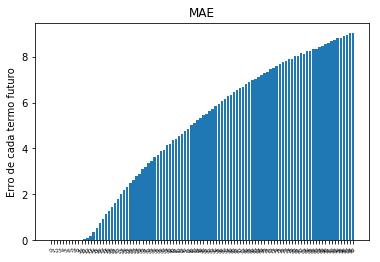

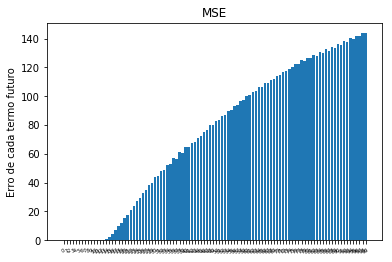

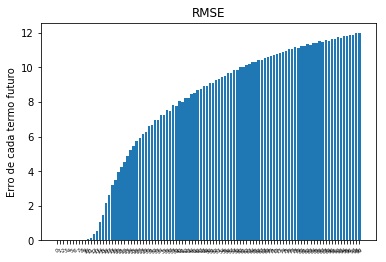

NameError: name 'mae_3d' is not defined

In [9]:
FUTUREerror = turnintoarray(future_error,future)
mae,mse,rmse = geterrors(FUTUREerror)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')

label = [1,2,3,4,5,6,7,8,9,10]

index = np.arange(len(mae))
plt.bar(index, mae)
plt.xticks(index, fontsize=5, rotation=30)
plt.title('MAE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

index = np.arange(len(mse))
plt.bar(index, mse)
plt.xticks(index, fontsize=5, rotation=30)
plt.title('MSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

index = np.arange(len(rmse))
plt.bar(index, rmse)
plt.xticks(index, fontsize=5, rotation=30)
plt.title('RMSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

index = np.arange(len(mae_3d))
plt.bar(index, mae_3d)
plt.xticks(index, fontsize=5, rotation=30)
plt.title('MAE na 3 casa decimal')
plt.ylabel('Erro de cada termo futuro')
plt.show()

index = np.arange(len(mse_3d))
plt.bar(index, mse_3d)
plt.xticks(index, fontsize=5, rotation=30)
plt.title('MSE na 3 casa decimal')
plt.ylabel('Erro de cada termo futuro')
plt.show()

index = np.arange(len(rmse_3d))
plt.bar(index, rmse_3d)
plt.xticks(index, fontsize=5, rotation=30)
plt.title('RMSE na 3 casa decimal')
plt.ylabel('Erro de cada termo futuro')
plt.show()

index = np.arange(len(mae_4d))
plt.bar(index, mae_4d)
plt.xticks(index, fontsize=5, rotation=30)
plt.title('MAE na 4 casa decimal')
plt.ylabel('Erro de cada termo futuro')
plt.show()

index = np.arange(len(mse_4d))
plt.bar(index, mse_4d)
plt.xticks(index, fontsize=5, rotation=30)
plt.title('MSE na 4 casa decimal')
plt.ylabel('Erro de cada termo futuro')
plt.show()

index = np.arange(len(rmse_4d))
plt.bar(index, rmse_4d)
plt.xticks(index, fontsize=5, rotation=30)
plt.title('RMSE na 4 casa decimal')
plt.ylabel('Erro de cada termo futuro')
plt.show()
    
    
    

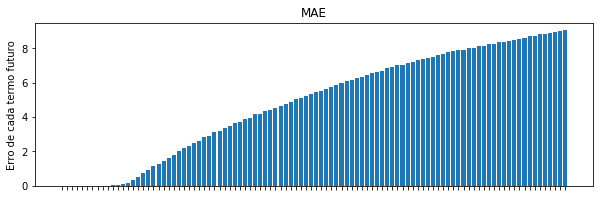

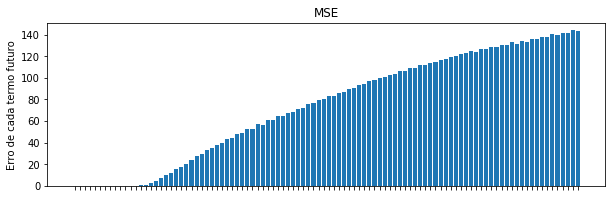

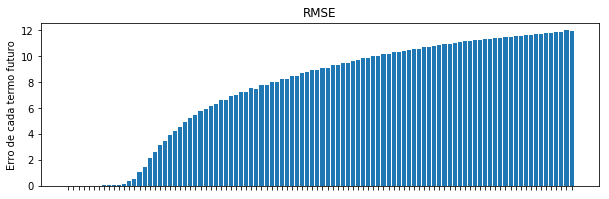

In [15]:
label = []

plt.figure(figsize=(10,3))
index = np.arange(len(mae))
plt.bar(index, mae)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse))
plt.bar(index, mse)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse))
plt.bar(index, rmse)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()
